In [2]:
import os
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# 数据路径
train_dir = r'C:\Users\xiaog\Desktop\Project\Datasets\dataset\dataset 4\Data Files\train'
valid_dir = r'C:\Users\xiaog\Desktop\Project\Datasets\dataset\dataset 4\Data Files\valid'
test_dir = r'C:\Users\xiaog\Desktop\Project\Datasets\dataset\dataset 4\Data Files\test'

# 解析XML文件，获取标签
def get_label_from_xml(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    objects = root.findall('object')

    # 如果存在 "thermal_defect"，返回 1，否则返回 0
    for obj in objects:
        if obj.find('name').text == 'thermal_defect':
            return "1"  # 必须是字符串

    return "0"  # 也必须是字符串


def count_defects_in_directory(data_dir):
    with_defect = 0
    without_defect = 0
    
    for xml_file in os.listdir(data_dir):
        if xml_file.endswith('.xml'):
            xml_path = os.path.join(data_dir, xml_file)
            label = get_label_from_xml(xml_path)
            
            if label == "1":
                with_defect += 1
            else:
                without_defect += 1
    
    return with_defect, without_defect

# 统计数据集中有缺陷和无缺陷的图像数量
train_with_defect, train_without_defect = count_defects_in_directory(train_dir)
valid_with_defect, valid_without_defect = count_defects_in_directory(valid_dir)
test_with_defect, test_without_defect = count_defects_in_directory(test_dir)


# 处理数据，返回 DataFrame（包含文件路径和标签）
def create_dataframe(data_dir):
    data = []
    
    for xml_file in os.listdir(data_dir):
        if xml_file.endswith('.xml'):
            xml_path = os.path.join(data_dir, xml_file)
            img_path = xml_path.replace('.xml', '.jpg')  # 假设图像文件与 XML 同名
            
            if os.path.exists(img_path):  # 确保图像文件存在
                label = get_label_from_xml(xml_path)  # 确保是字符串
                data.append([img_path, label])
    
    return pd.DataFrame(data, columns=['filepath', 'label'])

# 创建数据集 DataFrame
train_df = create_dataframe(train_dir)
valid_df = create_dataframe(valid_dir)
test_df = create_dataframe(test_dir)

# 统计数据
print(f"Train set: {len(train_df)} images")
print(f"Valid set: {len(valid_df)} images")
print(f"Test set: {len(test_df)} images")

# # 输出数据量
# print(f"Train generator samples: {train_generator.samples}")
# print(f"Valid generator samples: {valid_generator.samples}")
# print(f"Test generator samples: {test_generator.samples}")
# # print(train_df['label'])
# 输出结果
print(f"Train set - defect: {train_with_defect}, no_defect: {train_without_defect}")
print(f"Valid set - defect: {valid_with_defect}, no_defect: {valid_without_defect}")
print(f"Test set - defect: {test_with_defect}, no_defect: {test_without_defect}")


Train set: 3748 images
Valid set: 1071 images
Test set: 533 images
Train set - defect: 3321, no_defect: 427
Valid set - defect: 942, no_defect: 129
Test set - defect: 470, no_defect: 63


In [1]:
import os
import shutil

# 原始数据集路径
old_base_dir = r"C:\Users\xiaog\Desktop\Project\Datasets\dataset\dataset 4\Data Files"
new_base_dir = r"C:\Users\xiaog\Desktop\Project\Datasets\dataset\dataset 4"

# 确保目标目录存在
for folder in ["train", "valid", "test"]:
    os.makedirs(os.path.join(new_base_dir, folder, "images"), exist_ok=True)
    os.makedirs(os.path.join(new_base_dir, folder, "annotations"), exist_ok=True)

# 需要复制的子目录
categories = ["train", "valid", "test"]
image_extensions = [".jpg", ".png", ".jpeg", ".tiff", ".bmp"]

# 遍历 train、valid、test 目录，复制文件
for category in categories:
    old_path = os.path.join(old_base_dir, category)
    new_image_path = os.path.join(new_base_dir, category, "images")
    new_annotation_path = os.path.join(new_base_dir, category, "annotations")

    if not os.path.exists(old_path):
        print(f" Warning: Directory {old_path} does not exist. Skipping...")
        continue

    for file in os.listdir(old_path):
        file_path = os.path.join(old_path, file)
        if os.path.isfile(file_path):
            # 根据扩展名分类
            if file.lower().endswith(tuple(image_extensions)):
                shutil.copy(file_path, os.path.join(new_image_path, file))  # 复制文件
            elif file.lower().endswith(".xml"):
                shutil.copy(file_path, os.path.join(new_annotation_path, file))  # 复制 XML 文件

print("Completed successfully!")


Completed successfully!


In [2]:
import os

# Define dataset base path
base_dir = r"C:\Users\xiaog\Desktop\Project\Datasets\dataset\dataset 4"
categories = ["train", "valid", "test"]

# Iterate over train, valid, test directories
for category in categories:
    image_dir = os.path.join(base_dir, category, "images")
    annotation_dir = os.path.join(base_dir, category, "annotations")

    if not os.path.exists(image_dir) or not os.path.exists(annotation_dir):
        print(f"⚠️ Warning: {category} directory is missing. Skipping...")
        continue

    # Get all images (sorted for consistency)
    image_files = sorted([f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg', '.tiff', '.bmp'))])

    for idx, img_file in enumerate(image_files, start=1):
        # Extract file extension
        ext = os.path.splitext(img_file)[1]
        new_name = f"{category}_{idx:04d}{ext}"  # Format: train_0001.jpg

        # Rename image
        old_img_path = os.path.join(image_dir, img_file)
        new_img_path = os.path.join(image_dir, new_name)
        os.rename(old_img_path, new_img_path)

        # Rename corresponding XML annotation
        old_xml_path = os.path.join(annotation_dir, os.path.splitext(img_file)[0] + ".xml")
        new_xml_path = os.path.join(annotation_dir, os.path.splitext(new_name)[0] + ".xml")

        if os.path.exists(old_xml_path):
            os.rename(old_xml_path, new_xml_path)
        else:
            print(f"⚠️ Warning: Missing annotation for {img_file}, skipping XML rename.")

print("✅ Renaming completed successfully!")


✅ Renaming completed successfully!


In [ ]:
import os
import shutil
import random

# 设置随机种子，保证实验可复现
random.seed(42)

# 原始数据集路径
new_base_dir = r"C:\Users\xiaog\Desktop\Project\Datasets\dataset\dataset 4"

# 数据集划分比例（80:10:10, 60:20:20）
split_ratios = {
    "split_80_10_10": (0.8, 0.1, 0.1),
    "split_60_20_20": (0.6, 0.2, 0.2)
}

# 获取每个数据集中的图片文件
def get_image_files(dataset_dir):
    image_files = []
    for root, dirs, files in os.walk(dataset_dir):  # 遍历目录及其子目录
        for file in files:
            if file.lower().endswith(('.jpg', '.png', '.jpeg', '.tiff', '.bmp')):
                image_files.append(os.path.join(root, file))
    return image_files

# 获取已有的train, valid, test集中的图片文件
existing_train_dir = r"C:\Users\xiaog\Desktop\Project\Datasets\dataset\dataset 4\split_70_20_10\train"
existing_valid_dir = r"C:\Users\xiaog\Desktop\Project\Datasets\dataset\dataset 4\split_70_20_10\valid"
existing_test_dir = r"C:\Users\xiaog\Desktop\Project\Datasets\dataset\dataset 4\split_70_20_10\test"

train_images = get_image_files(existing_train_dir)
valid_images = get_image_files(existing_valid_dir)
test_images = get_image_files(existing_test_dir)

# 合并所有图片，分配标签
all_images = train_images + valid_images + test_images

# 函数：根据比例划分数据
def split_data(image_list, train_ratio, valid_ratio, test_ratio):
    random.shuffle(image_list)  # 打乱顺序
    total_count = len(image_list)
    
    train_size = int(total_count * train_ratio)
    valid_size = int(total_count * valid_ratio)
    test_size = total_count - train_size - valid_size

    train_set = image_list[:train_size]
    valid_set = image_list[train_size:train_size + valid_size]
    test_set = image_list[train_size + valid_size:]
    
    return train_set, valid_set, test_set

# 创建不同划分方式的目标文件夹
for split_name, (train_ratio, valid_ratio, test_ratio) in split_ratios.items():
    for dataset_type in ["train", "valid", "test"]:
        # 创建文件夹
        os.makedirs(os.path.join(new_base_dir, split_name, dataset_type, "images"), exist_ok=True)
        os.makedirs(os.path.join(new_base_dir, split_name, dataset_type, "annotations"), exist_ok=True)

    # 根据划分比例分割数据
    train_files, valid_files, test_files = split_data(all_images, train_ratio, valid_ratio, test_ratio)

    # 函数：复制图片和对应的XML文件
    def copy_files(files, dataset_type):
        for file in files:
            image_name = os.path.basename(file)
            # 复制图片
            dst_img = os.path.join(new_base_dir, split_name, dataset_type, "images", image_name)
            shutil.copy(file, dst_img)

            # 复制对应的 XML 标注文件
            xml_file = image_name.replace(image_name.split(".")[-1], "xml")
            src_xml = file.replace(image_name, xml_file)
            dst_xml = os.path.join(new_base_dir, split_name, dataset_type, "annotations", xml_file)
            if os.path.exists(src_xml):
                shutil.copy(src_xml, dst_xml)

    # 复制文件到目标文件夹
    copy_files(train_files, "train")
    copy_files(valid_files, "valid")
    copy_files(test_files, "test")

    print(f"\nSplit method: {split_name}")
    print(f"  -> Train: {len(train_files)} images")
    print(f"  -> Valid: {len(valid_files)} images")
    print(f"  -> Test: {len(test_files)} images")

print("\n Dataset splitting completed!")


In [ ]:
# 训练数据增强（仅用于训练集）
train_datagen = ImageDataGenerator(
    rescale=1./255,  # 归一化
    rotation_range=30,  # 随机旋转
    width_shift_range=0.2,  # 水平平移
    height_shift_range=0.2,  # 垂直平移
    shear_range=0.2,  # 剪切变换
    zoom_range=0.2,  # 缩放
    horizontal_flip=True  # 随机水平翻转
)

# 验证 & 测试数据（仅归一化，不做增强）
valid_test_datagen = ImageDataGenerator(rescale=1./255)

# 生成训练数据
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="filepath",
    y_col="label",
    target_size=(240,240),
    batch_size =32,
    class_mode="categorical"  
)

# 生成验证数据
valid_generator = valid_test_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col="filepath",
    y_col="label",
    target_size=(240,240),
     batch_size = 32,
    class_mode="categorical"
)

# 生成测试数据
test_generator = valid_test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="filepath",
    y_col="label",
    target_size=(240,240),
    batch_size = 32,
    class_mode="categorical",
    shuffle=False  # 测试数据不打乱顺序
)


# 输出数据量
print(f"Train generator samples: {train_generator.samples}")
print(f"Valid generator samples: {valid_generator.samples}")
print(f"Test generator samples: {test_generator.samples}")
# print(train_df['label'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

# 加载一张原始图像
image_path = r'C:\Users\xiaog\Desktop\Project\Datasets\dataset\dataset 4\Data Files\train\5_jpg.rf.c441ecdf2f24fbdc62e5429397f49c36.jpg'  # 替换为你的图像路径
original_image = load_img(image_path, target_size=(640, 640))  # 调整图像大小
original_image = img_to_array(original_image)  # 转换为NumPy数组
original_image = np.expand_dims(original_image, axis=0)  # 增加批次维度

# 生成三种不同的增强后的图像
augmented_images = train_datagen.flow(original_image, batch_size=1)
augmented_image_1 = next(augmented_images)[0]  # 第一次增强
augmented_image_2 = next(augmented_images)[0]  # 第二次增强
augmented_image_3 = next(augmented_images)[0]  # 第三次增强

# 将原始图像和三种增强后的图像并排显示
plt.figure(figsize=(15, 5))

# 显示原始图像
plt.subplot(1, 4, 1)
plt.imshow(original_image[0] / 255.0)  # 归一化显示
plt.title('Original Image')
plt.axis('off')

# 显示第一次增强后的图像
plt.subplot(1, 4, 2)
plt.imshow(augmented_image_1)
plt.title('Augmented 1')
plt.axis('off')

# 显示第二次增强后的图像
plt.subplot(1, 4, 3)
plt.imshow(augmented_image_2)
plt.title('Augmented 2')
plt.axis('off')

# 显示第三次增强后的图像
plt.subplot(1, 4, 4)
plt.imshow(augmented_image_3)
plt.title('Augmented 3')
plt.axis('off')

plt.tight_layout()
plt.show()

In [2]:
import tensorflow as tf 
print(tf.version)

<module 'tensorflow._api.v2.version' from 'D:\\anaconda3\\envs\\python3999\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>


In [22]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
import tensorflow as tf
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         tf.config.experimental.set_virtual_device_configuration(
#             gpus[0],
#             [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)]  # 限制为 4GB
#         )
#         print("GPU 内存限制已设置！")
#     except RuntimeError as e:
#         print(e)

def inception_module(x, filters):
    # 1x1卷积分支
    conv1x1 = Conv2D(filters, (1,1), padding='same', activation='relu')(x)
    
    # 3x3卷积分支
    conv3x3 = Conv2D(filters, (3,3), padding='same', activation='relu')(x)
    
    # 5x5卷积分支
    conv5x5 = Conv2D(filters, (5,5), padding='same', activation='relu')(x)
    
    # 池化分支
    pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(x)
    pool = Conv2D(filters, (1,1), padding='same', activation='relu')(pool)
    
    # 合并各分支
    merged = concatenate([conv1x1, conv3x3, conv5x5, pool], axis=-1)
    return merged

def attention_block(inputs):
    attention = Dense(1, activation='tanh')(inputs)    # (batch_size, seq_length, 1)
    attention = Flatten()(attention)                   # (batch_size, seq_length)
    attention = Activation('softmax')(attention)       # (batch_size, seq_length)
    attention = Reshape((inputs.shape[1], 1))(attention)  # (batch_size, seq_length, 1)
    
    context = Multiply()([inputs, attention])          # (batch_size, seq_length, features)
    return context


# input
inputs = Input(shape=(240,240, 3))

# Inception
x = inception_module(inputs, 32)
x = MaxPooling2D(2)(x)
x = inception_module(x, 64)
x = MaxPooling2D(2)(x)
x = inception_module(x, 128)
x = GlobalAveragePooling2D()(x)


x = Reshape((-1, 128))(x)  

# BiLSTM
x = Bidirectional(LSTM(64, return_sequences=True))(x)
x = Dropout(0.3)(x)
# attention
x = attention_block(x)
x = GlobalAveragePooling1D()(x)

# 分类层
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(2, activation='softmax')(x) 

# 构建模型
model = Model(inputs=inputs, outputs=outputs)

model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 240, 240, 3  0           []                               
                                )]                                                                
                                                                                                  
 max_pooling2d_5 (MaxPooling2D)  (None, 240, 240, 3)  0          ['input_2[0][0]']                
                                                                                                  
 conv2d_12 (Conv2D)             (None, 240, 240, 32  128         ['input_2[0][0]']                
                                )                                                                 
                                                                                            

In [23]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy', 
             Precision(name='precision'), 
             Recall(name='recall'), 
             'AUC']
)

In [24]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
# import warnings
# warnings.filterwarnings("ignore", category=tf.keras.utils.generic_utils.CustomMaskWarning)


# assume epochs and bacth size
epochs = 40
batch_size = 32 

steps_per_epoch = train_generator.samples // batch_size
validation_steps = valid_generator.samples // batch_size

from tensorflow.keras.callbacks import ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1),  # 保存验证集损失最小的模型
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6)
]


model_checkpoint = ModelCheckpoint(
    filepath='best_model.h5',  # 保存最优模型的路径
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,  
    validation_data=valid_generator,
    validation_steps=validation_steps, 
    epochs=epochs,
    callbacks=callbacks
)


Epoch 1/40
117/117 [==============================] - ETA: 0s - loss: 0.4568 - accuracy: 0.8719 - precision: 0.8719 - recall: 0.8719 - auc: 0.8862
Epoch 1: val_loss improved from inf to 0.37083, saving model to best_model.h5
117/117 [==============================] - 96s 706ms/step - loss: 0.4568 - accuracy: 0.8719 - precision: 0.8719 - recall: 0.8719 - auc: 0.8862 - val_loss: 0.3708 - val_accuracy: 0.8788 - val_precision: 0.8788 - val_recall: 0.8788 - val_auc: 0.8841 - lr: 1.0000e-04
Epoch 2/40
117/117 [==============================] - ETA: 0s - loss: 0.3674 - accuracy: 0.8859 - precision: 0.8859 - recall: 0.8859 - auc: 0.8884
Epoch 2: val_loss improved from 0.37083 to 0.36361, saving model to best_model.h5
117/117 [==============================] - 79s 673ms/step - loss: 0.3674 - accuracy: 0.8859 - precision: 0.8859 - recall: 0.8859 - auc: 0.8884 - val_loss: 0.3636 - val_accuracy: 0.8807 - val_precision: 0.8807 - val_recall: 0.8807 - val_auc: 0.9057 - lr: 1.0000e-04
Epoch 3/40
117/1

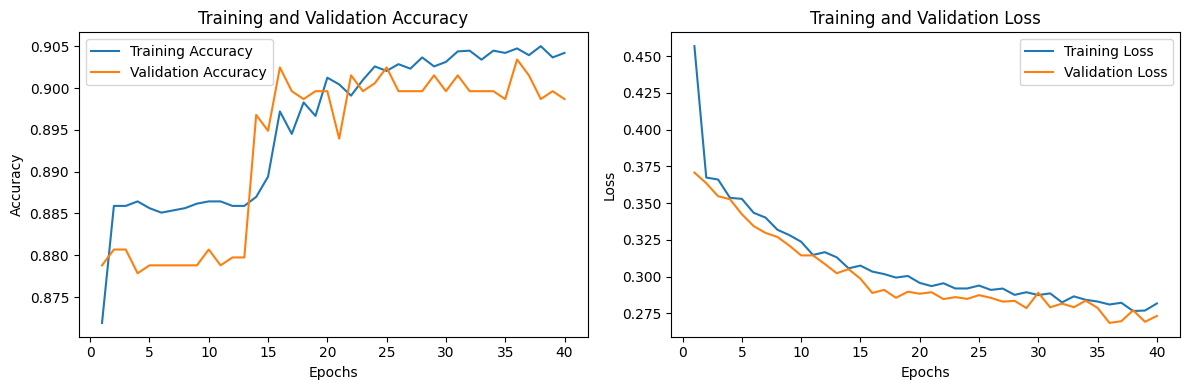

In [25]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

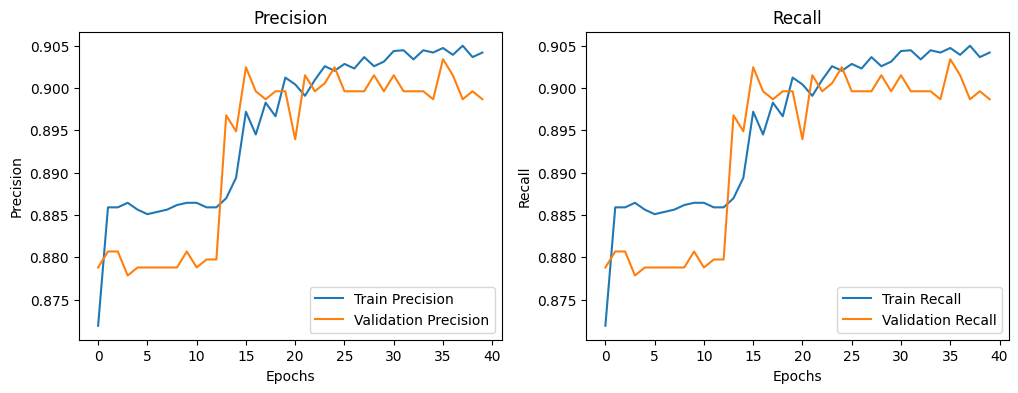

In [26]:
def plot_precision_recall(history):
    if 'precision' not in history.history or 'recall' not in history.history:
        print("No precision or recall data found in history!")
        return
    
    plt.figure(figsize=(12, 4))
    
    # Precision plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['precision'], label='Train Precision')
    plt.plot(history.history['val_precision'], label='Validation Precision')
    plt.title('Precision')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.legend()

    # Recall plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['recall'], label='Train Recall')
    plt.plot(history.history['val_recall'], label='Validation Recall')
    plt.title('Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.legend()

    plt.show()

plot_precision_recall(history)


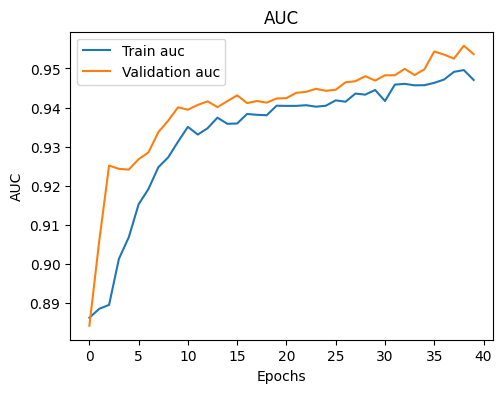

In [27]:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['auc'], label='Train auc')
    plt.plot(history.history['val_auc'], label='Validation auc')
    plt.title('AUC')
    plt.xlabel('Epochs')
    plt.ylabel('AUC')
    plt.legend()
    plt.show()

In [28]:
test_loss, test_accuracy, test_precision, test_recall, test_auc = model.evaluate(test_generator, verbose=1)


# Print the metrics
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test AUC: {test_auc}")


17/17 [==============================] - 5s 236ms/step - loss: 0.2605 - accuracy: 0.9043 - precision: 0.9043 - recall: 0.9043 - auc: 0.9579
Test Loss: 0.26049524545669556
Test Accuracy: 0.904315173625946
Test Precision: 0.904315173625946
Test Recall: 0.904315173625946
Test AUC: 0.95792156457901


In [29]:
from sklearn.metrics import confusion_matrix
import numpy as np

test_steps = test_generator.n // test_generator.batch_size
y_true = []
y_pred = []

for _ in range(test_steps):
    x, y = test_generator.next()
    predictions = model.predict(x)
    y_true.extend(np.argmax(y, axis=1))
    y_pred.extend(np.argmax(predictions, axis=1))

cm = confusion_matrix(y_true, y_pred)

# 计算TP, TN, FP, FN
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensitivity = TP / float(TP + FN)
specificity = TN / float(TN + FP)

print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')

1/1 [==============================] - 0s 63ms/step
Sensitivity: 0.9977973568281938
Specificity: 0.22413793103448276


In [30]:
from sklearn.metrics import f1_score
import numpy as np

test_steps = test_generator.n // test_generator.batch_size
y_true = []
y_pred = []

for _ in range(test_steps):
    x, y = test_generator.next()
    predictions = model.predict(x)
    y_true.extend(np.argmax(y, axis=1))
    y_pred.extend(np.argmax(predictions, axis=1))

f1 = f1_score(y_true, y_pred, average='binary')  

print(f'F1 Score: {f1}')

1/1 [==============================] - 0s 58ms/step
F1 Score: 0.9460043196544277


1/1 [==============================] - 0s 76ms/step


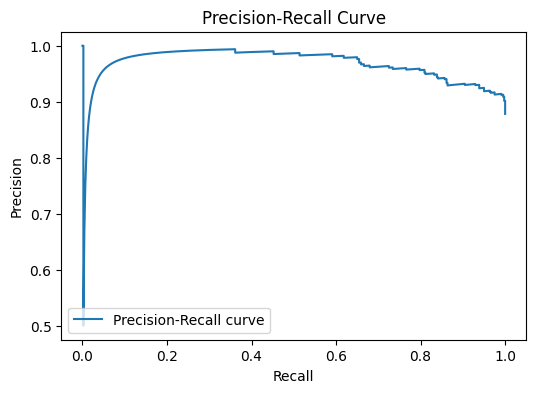

In [31]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

test_steps = test_generator.n // test_generator.batch_size
y_true = np.array([])
y_scores = np.array([])

for _ in range(test_steps):
    x, y = test_generator.next()
    predictions = model.predict(x)
    y_true = np.append(y_true, np.argmax(y, axis=1))
    y_scores = np.append(y_scores, predictions[:, 1])  # 假设第二列为阳性类别的预测概率

precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

1/1 [==============================] - 0s 52ms/step


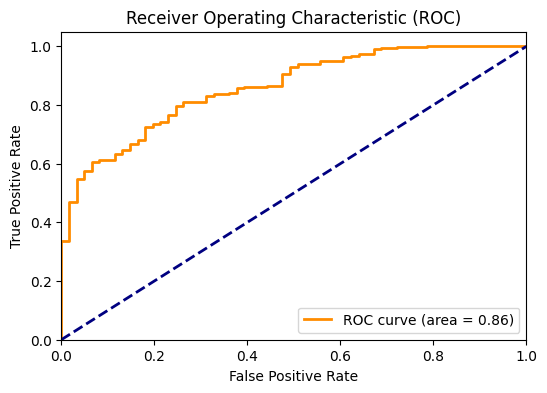

In [32]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

test_steps = test_generator.n // test_generator.batch_size
y_true = np.array([])
y_scores = np.array([])

for _ in range(test_steps):
    x, y = test_generator.next()
    predictions = model.predict(x)
    y_true = np.append(y_true, np.argmax(y, axis=1))
    y_scores = np.append(y_scores, predictions[:, 1])  # 假设第二列为阳性类别的预测概率

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
for layer in model.layers[::-1]:  # 逆序遍历
    if 'conv' in layer.name:
        print("The last layer:", layer.name)
        break

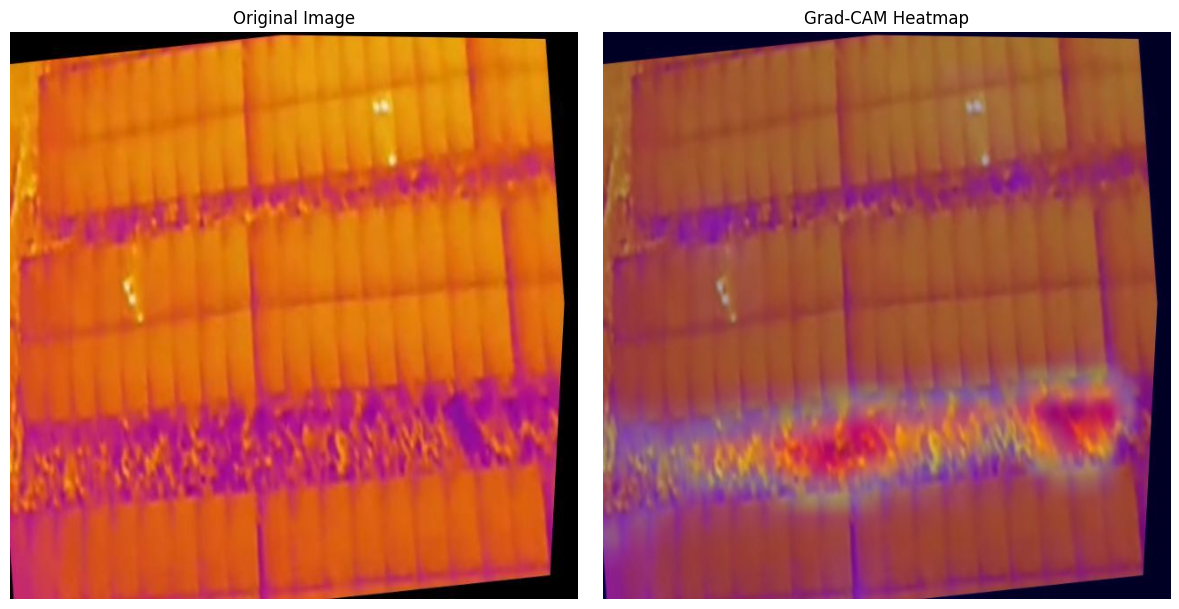

In [19]:
#XAI-GRAD CAM
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import tensorflow as tf

def gamma_correction(image, gamma=1.0):
    return np.power(image, gamma)

def linear_stretch(image):
    min_val = np.min(image)
    max_val = np.max(image)
    stretched = (image - min_val) / (max_val - min_val) * 255
    return stretched.astype(np.uint8)

def get_img_array(img_path, size):
    img = image.load_img(img_path, target_size=size)
    array = image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array * 1./255  # Match the rescale factor used in ImageDataGenerator

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4, gamma=1.0):
    img = image.load_img(img_path)
    img = image.img_to_array(img)

    heatmap = np.uint8(255 * heatmap)

    heatmap = gamma_correction(heatmap, gamma)

    heatmap = linear_stretch(heatmap)

    jet = plt.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    jet_heatmap = image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = image.img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = image.array_to_img(superimposed_img)

    superimposed_img.save(cam_path)


    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # 原始图像
    ax[0].imshow(img / 255.0)  # Normalize to [0, 1] range for displaying
    ax[0].set_title("Original Image")
    ax[0].axis('off')

    # 叠加热图的图像
    ax[1].imshow(superimposed_img)
    ax[1].set_title("Grad-CAM Heatmap")
    ax[1].axis('off')

    plt.tight_layout()
    plt.show()

    return cam_path

img_path = r"C:\Users\xiaog\Desktop\Project\Datasets\dataset\dataset 4\Data Files\train\3_jpg.rf.30701df206b2f1ae280bf1d1b050e85d.jpg"
img_array = get_img_array(img_path, size=(128,128))  # 使用正确的输入尺寸
heatmap = make_gradcam_heatmap(img_array, model, 'conv2d_11', pred_index=0)  # 使用正确的层名称
cam_path = save_and_display_gradcam(img_path, heatmap, gamma=1.5)  # 使用伽马校正


